# Exploratory data analysis on Twitter data

In this notebook, we will do an Exploratory Data Analysis the Twitter data given and we will also be developing NLP models to predict the sentiment<br> of the data, i.e the comments.  

The idea of **```NLP```** in simple words: since we deal with text data here, the ultimate goal is to convert the text data to numerical data so<br> that computers can understand!!

To know more about NLP, please refer the following documents: 
- [Natural Language processing](https://en.wikipedia.org/wiki/Natural_language_processing)
- [NLP explained](https://www.ibm.com/topics/natural-language-processing)
- [NLP steps to follow](https://www.techtarget.com/searchenterpriseai/definition/natural-language-processing-NLP)

By the end of this notebook, we will see:
-  how to train, test and deploy an AI model to predict sentiment from thousands of given tweets. 

Lets start by importing all the required Libraries!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will 
# be hard to see them. 
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white' # This is to make the background of all the plots white, so that its easy for us to see!

In [2]:
# Load the data
tweets_df = pd.read_csv('./data/twitter.csv')

See the dataset

In [3]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


Here we can see the tweets in the column ```tweet```.

In [6]:
#check the shape of the dataset
tweets_df.shape

(31962, 3)

- Here we have 31962 rows and 3 columns!

Check the datatypes and other information of these data

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


- We can see that the Dtype of the ```tweet```column is object and is because, the given data are texts.
- Also there are no null values present in any of the columns

Lets check the statistics of each of the columns

In [7]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


The above table makes sense! 
- Because the maximum value of the label column is 1 and the minimum is 0.
- The column ```tweet``` contains texts and ```.describe()``` only works with numbers.

Let's see the tweets:

In [8]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

We don't need the id column. Lets drop it and view again!

In [9]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


## Data Visualization 

Let's visualize the data and see how it looks!

Lets draw a histogram showing the label column:

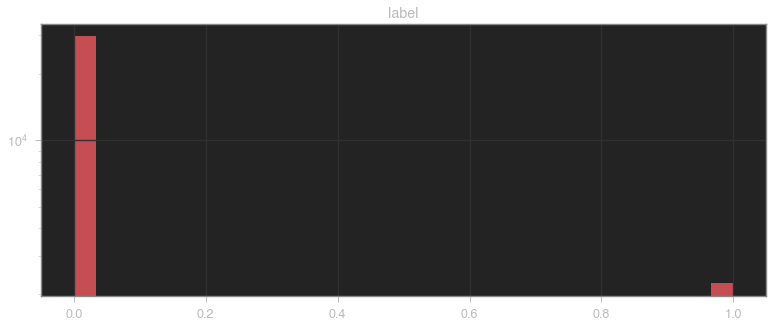

In [10]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')
plt.yscale('log')

We see that there are more data with the label ```0``` and less with the label ```1```.

Let's get the length of each of the tweets and add it as a separate column in the dataframe

In [11]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


let's check the statistics of the dataframe again!

In [12]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


Now we see the statistics for the column ```length``` too. We can see that:
- the maximum length of the word is 274 and minimum is 11.

Let's do something more interesting. Let's grab the tweet with shortest length.

In [13]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]

'i love you '

That was cool right!!!

Let's grab the tweet with the mean length, i.e 

In [14]:
# Let's view the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

Let's see the distribution of the length column:

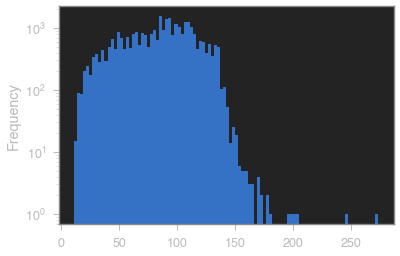

In [15]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist') 
plt.yscale('log')

- We can see that most, most words have a length in between 50-130.

Lets plot the **```Wordcloud```**!!

## Wordcloud

```Wordcloud``` is a visual representation of text data which is often used to depict keyword metadata on websites, or to visualize free<br> form text. Tags are usually single words, and the importance of each tag is shown with font size or color.

This is an interesting concept! To know more about it, see [here](https://medium.com/@harinisureshla/wordclouds-basics-of-nlp-5b60be226414).

Let's visualize the wordcloud of the positive (tweets with label ```0```) and negitive (tweets with label ```1```) tweets separately: 

In [16]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [17]:
negative = tweets_df[tweets_df['label']==1]
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


Let's join all the positive tweets into a sentence by converting into a list and then draw a wordcloud!

In [ ]:
positive_list = positive['tweet'].tolist() # convert positive tweets to list
positive_list

- Above we can see several sentences which are considered to be positive in the dataset. 

In [20]:
positive_sentences_as_one_string = " ".join(positive_list) # join the positive tweet list to a sentence

In [ ]:
!pip install wordcloud # install wordcloud using pip

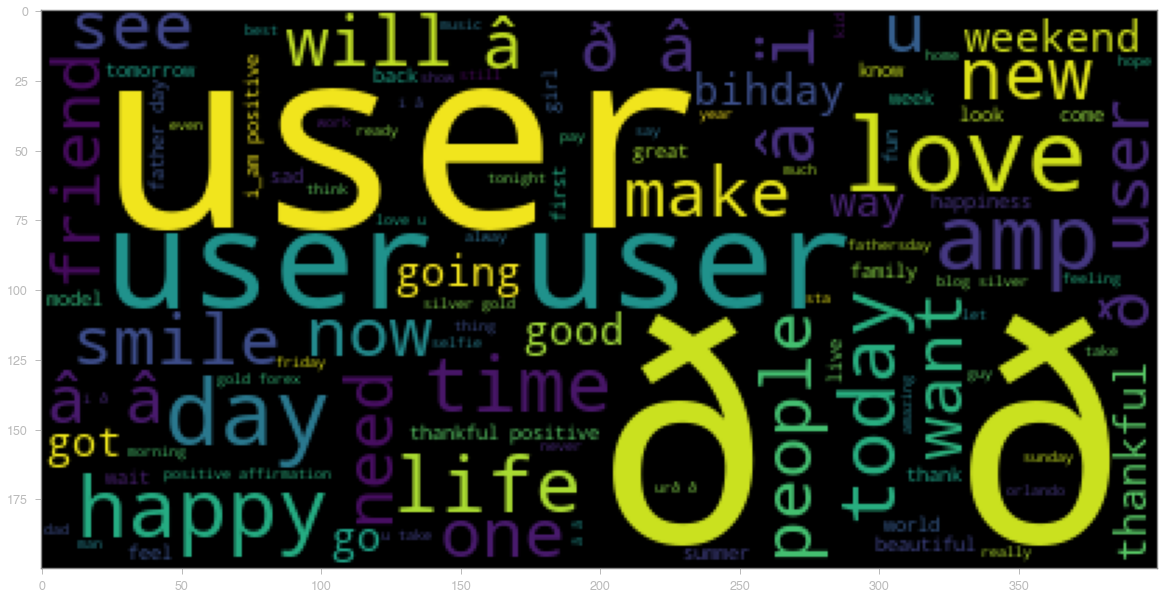

In [22]:
from wordcloud import WordCloud #import wordcloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string)) #plotting the wordcloud for the positive tweets

We can see somany words in somany size and colours. What does it mean? Its simple:
- The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is
- Now the wordcloud makes sense right??

Let's do the same for negitive tweets too, so that at the end, we have a word cloud for negitive tweets too.

In [ ]:
negative_list = negative['tweet'].tolist() #converting tweets to list
negative_list

In [24]:
negative_sentences_as_one_string = " ".join(negative_list) # join the positive tweet list to a sentence

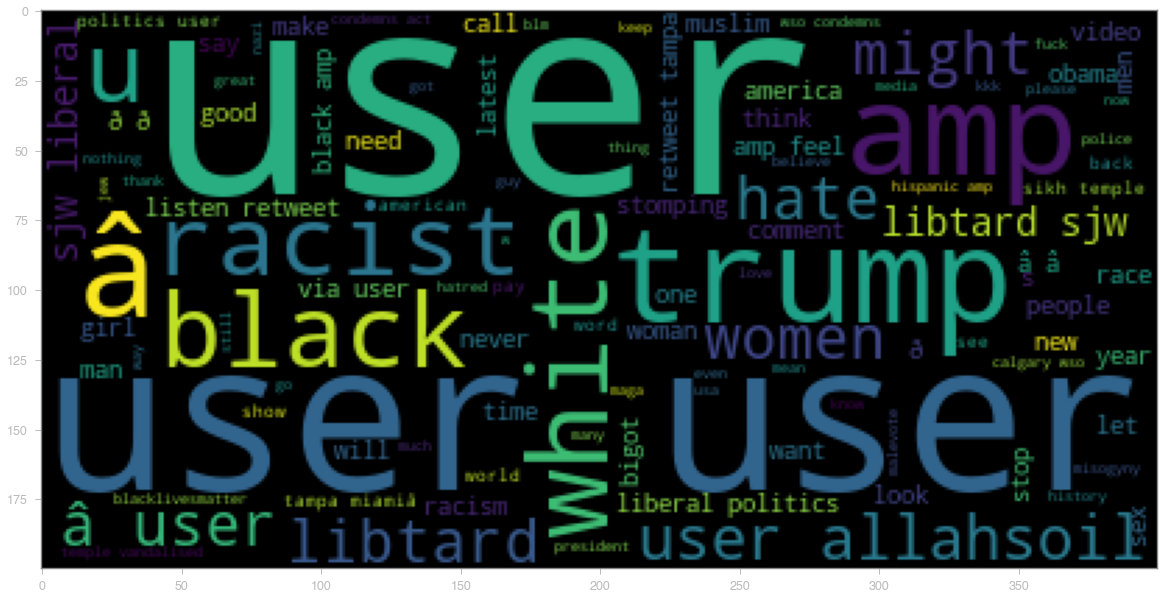

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

- Above we can see several words which are listed as negitive

## Data Cleaning

Let's start cleaning the data! There are several step involved in cleaning a text data. Let's discuss one by one. 

Now we are going to implement a function which 
- remove ```punctuation``` 
- remove ```stop words```
- performs ```count vectorization (Tockenization)```

```Punctuation```, ```Stop words``` and ```Tockenization``` are the 3 important steps that has to be followed in NLP data cleaning!

We can start by importing useful packages for this pourpose:

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

So Punctuations are certain conventional marks or characters in writing or printing in order to separate elements and make the meaning clear.

To know more on Punctuation, see [here](https://studymachinelearning.com/text-preprocessing-removal-of-punctuations/).

What are ```stop words```??

In [27]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haritharetnakaran/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Above we can see stop words! So they are a set of commonly used words in any language. In NLP, stop words are used to<br> eliminate unimportant words, allowing applications to focus on the important words instead. To get a bit more idea,<br> read [here](https://kavita-ganesan.com/what-are-stop-words/#:~:text=Stop%20words%20are%20a%20set,While%E2%80%A6).

Last but not least, what is ```Vectorization```?

So it is the process of of converting words into numbers are called Vectorization! It is a methodology in NLP to map<br> words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions,<br> word similarities/semantics. To know the idea of vectorization in detail, please read this [document](https://neptune.ai/blog/vectorization-techniques-in-nlp-guide).

In [33]:
from sklearn.feature_extraction.text import CountVectorizer # import count vectorizer module

Our idea here is to build a pipeline which does the above 3 techniques and clean our data, so that its easy to call it whenever we needed to<br> perform those actions.

In [29]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

Let'S check the above function on our Twitter dataset!

In [30]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [31]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [32]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


- From the above two versions, we can see how the cleaning has done its magic!

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet']) #transform our data using the vectorizer we created

In [36]:
print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

/Users/haritharetnakaran/.pyenv/versions/3.9.8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


This is how the vectorizer looks like!

Lets convert our text data into a vectorized output for further analysis:

In [38]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


- What we see above is the vectorized version of our data!

See the shape of the vectorised output:

In [39]:
tweets_countvectorizer.shape

(31962, 47386)

- So we still have 31962 inputs!! But 47386 columns!

Now comes the magic! Let's convert our vectorized array to a dataframe! So that it looks similar to our initial dataframe, but with different inputs!

In [41]:
X = pd.DataFrame(tweets_countvectorizer.toarray()) #features to be trained
X

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Now we can see the whole dataset with all the feature! This is the dataset that we are using from hereonwards to train!

Where is out ```label``` now? Let's just grab it from the first data frame:

In [43]:
y = tweets_df['label'] # label to be predicted
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

## Train and evaluate a Naive Bayes classifier model

In statistics, ```naive Bayes classifiers``` are a family of simple "probabilistic classifiers" based on applying ```Bayes' theorem``` with strong<br> (naive) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models.

To know more about the theory behind this model, read the following documents:
- Naive Bayes(https://scikit-learn.org/stable/modules/naive_bayes.html)
- Bayes' Theorem(https://www.investopedia.com/terms/b/bayes-theorem.asp)

Now we follow the same procedure that we do with a numerical data. 
- Split the data in to train and test! 
- do the training
- evaluate the results

In [44]:
# check the shape of the data
print(X.shape)
print(y.shape)

(31962, 47386)
(31962,)


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split the data in to 80/20

In [46]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB() # model to be used
NB_classifier.fit(X_train, y_train) # train the model using training data

MultinomialNB()

For the evaluation of the model, we have to use an evaluation matrix. 

In [47]:
from sklearn.metrics import classification_report, confusion_matrix # import evaluation matrix

<AxesSubplot: >

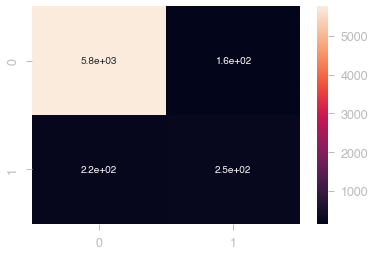

In [48]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

- Above confusion matrix shows the true positives, true negatives, false positives and false negitives from our prediction using the model on our<br> test data!

Let's see the classification report:

In [49]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5916
           1       0.61      0.53      0.57       477

    accuracy                           0.94      6393
   macro avg       0.79      0.75      0.77      6393
weighted avg       0.94      0.94      0.94      6393



What you see above are:
- the precision of the model prediction on each class: positive and negitive and we see that the model prediction did well on the positive class<br>
with a precision of 0.96, recall of 0.97 and an f1-score of 0.97. This is great!
- below that we see the weighted average of the prediction in total and it gives us a value of 0.94, which is a great model! 